# Plutchik set of emotions 

In [2]:
import os
os.environ["SHELL"] = "/bin/bash"

In [15]:
%%capture
!pip install matplotlib textblob nrclex
!python3 -m textblob.download_corpora

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from nrclex import NRCLex

In [ ]:
SYMPTOMS = [
    "NO_SYMPTOMS",
    "DEPRESSED_MOOD",
    "ANHEDONIA",
    "APPETITE_CHANGE",
    "SLEEP_ISSUES",
    "PSYCHOMOTOR",
    "FATIGUE",
    "WORTHLESSNESS",
    "COGNITIVE_ISSUES",
    "SUICIDAL_THOUGHTS",
]

In [18]:
data = pd.read_csv("data/redsm5.csv")

texts_per_symptom = {}
for symptom in SYMPTOMS:
    texts_per_symptom[symptom] = data.loc[
        data["labels"].str.contains(symptom), "text"
    ].tolist()

In [20]:
emotions_per_symptom = {}
for symptom, texts in texts_per_symptom.items():
    emotions_per_symptom[symptom] = NRCLex(" ".join(texts))

In [22]:
results = {}
for symptom, emotions in emotions_per_symptom.items():
    blob = TextBlob(" ".join(texts_per_symptom[symptom]))
    sentences = list(blob.sentences)
    results[symptom] = {
        "blob": blob,
        "sentences": sentences,
        "emotion_percentage": {
            key: value / len(sentences)
            for key, value in emotions.raw_emotion_scores.items()
        },
    }

In [94]:
results_sorted = {}
for symptom, result in results.items():
    results_sorted[symptom] = list(
        dict(
            sorted(result["emotion_percentage"].items(), key=lambda item: item[0])
        ).values()
    )

In [95]:
def radar_plot(results_sorted, title):
    categories = sorted(
        [
            "fear",
            "anger",
            "anticipation",
            "trust",
            "surprise",
            "positive",
            "negative",
            "sadness",
            "disgust",
            "joy",
        ]
    )

    num_categories = len(categories)
    angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for symptom, values in results_sorted.items():
        values += values[:1]
        ax.plot(
            angles, values, linewidth=2, linestyle="solid", alpha=0.5, label=symptom
        )
        ax.fill(angles, values, alpha=0.2)

    ax.set_thetagrids(np.degrees(angles[:-1]), categories, fontsize=14)
    ax.set_title(title, fontsize=16, fontweight="bold", pad=20)

    plt.yticks(
        [0.2, 0.4, 0.6, 0.8, 1],
        ["20%", "40%", "60%", "80%", "100%"],
        color="grey",
        size=12,
    )
    ax.set_ylim(0, 1)

    ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=2, fontsize=12)

    plt.show()

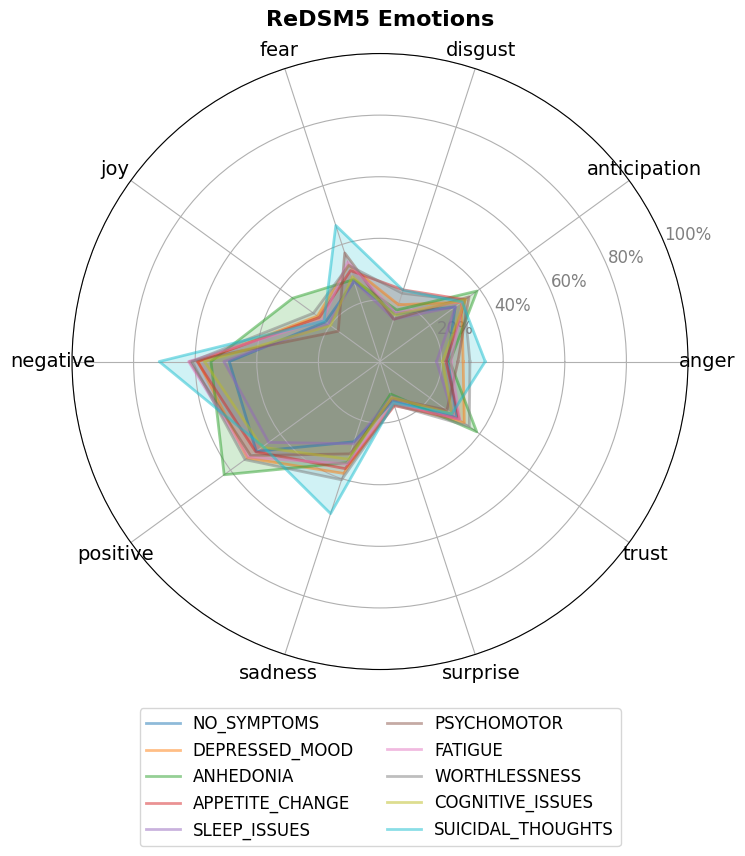

In [96]:
radar_plot(results_sorted, "ReDSM5 Emotions")